# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json() 

In [5]:
import json

In [6]:
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18866406,
            "total_supply": 18866406,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 62147.0,
                    "volume_24h": 28244229931,
                    "market_cap": 1168860956217,
                    "percentage_change_1h": -0.111585831515705,
                    "percentage_change_24h": 2.22585010463882,
                    "percentage_change_7d": 0.501489054744703,
                    "percent_change_1h": -0.111585831515705,
                    "percent_change_24h": 2.22585010463882,
                    "percent_change_7d": 0.501489054744703
                }
            },
            "last_updated": 1636291711
        }
    },
    "metadata": {
        "timestamp": 1636291711,
        "num_cr

In [7]:
# Fetch current BTC price
btc_price= btc_data['data']['1']['quotes']['USD']['price']
btc_price

62147.0

In [8]:
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 118245017,
            "total_supply": 118245017,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 4620.47,
                    "volume_24h": 16747276047,
                    "market_cap": 544570884269,
                    "percentage_change_1h": 0.098677360752807,
                    "percentage_change_24h": 4.7313340943595,
                    "percentage_change_7d": 6.84134812524768,
                    "percent_change_1h": 0.098677360752807,
                    "percent_change_24h": 4.7313340943595,
                    "percent_change_7d": 6.84134812524768
                }
            },
            "last_updated": 1636291704
        }
    },
    "metadata": {
        "timestamp": 1636291704,
        "num_crypto

In [9]:
# Fetch current ETH price
eth_price= eth_data['data']['1027']['quotes']['USD']['price']
eth_price

4620.47

In [10]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc

my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74576.40
The current value of your 5.3 ETH is $24488.49


In [11]:
total_crypto = my_btc_value + my_eth_value
total_crypto

99064.891

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
# Format current date as ISO format
today = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-11-05 00:00:00-04:00  114.99  115.3199  114.9001  115.24  6641501   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-11-05 00:00:00-04:00  469.28  470.65  466.92  468.49  56119290

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $468.49


In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23424.50
The current value of your 200 AGG shares is $23048.00


In [18]:
total_shares = my_agg_value + my_spy_value
total_shares

46472.5

### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = {
    "Amount": [total_crypto,total_shares]
}

#Set the tickers
assets = ["Crypto", "Shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index= assets)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,99064.891
Shares,46472.500


<AxesSubplot:title={'center':'Investment Savings'}, ylabel='Amount'>

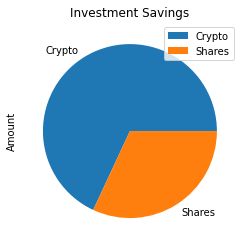

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title= "Investment Savings" )

In [21]:
# Set ideal emergency fund
ideal_emergency_fund = monthly_income * 3
ideal_emergency_fund

36000

In [22]:
# Calculate total amount of savings
total_savings = round((total_crypto + total_shares),2)
total_savings

145537.39

In [23]:
# Validate saving health
if total_savings > ideal_emergency_fund:
    print(f"Congratulations!! you have ${total_savings} you have more than enough funds")
elif total_savings == ideal_emergency_fund:
    print(f"Congratulations in reaching your goal of {total_savings}")
else: 
    print(f"You're almost at your goal, you need to save ({ideal_emergency_fund}-{total_savings})")


Congratulations!! you have $145537.39 you have more than enough funds


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-11-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-05', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                              open     high      low   close   volume    open   
time                                                                            
2021-06-17 00:00:00-04:00  114.792  115.250  114.785  114.99  7417691  421.67   
2021-06-18 00:00:00-04:00  115.050  115.390  114.910  115.29  5438261  417.08   
2021-06-21 00:00:00-04:00  115.060  115.120  114.921  114.96  4934966  416.80   
2021-06-22 00:00:00-04:00  114.830  115.140  114.830  115.11  5299846  420.85   
2021-06-23 00:00:00-04:00  115.060  115.138  114.990  115.05  5000374  423.19   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-17 00:00:00-04:00  423.0200  419.32  421.97  71991686  
2021-06-18 00:00:00-04:00  417.8281  414.70  415.01  92753385  
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_Shares = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [27]:
# Printing the simulation input data
MC_Shares.portfolio_data.head()

AGG                                     \
                              open     high      low   close   volume   
time                                                                    
2021-06-17 00:00:00-04:00  114.792  115.250  114.785  114.99  7417691   
2021-06-18 00:00:00-04:00  115.050  115.390  114.910  115.29  5438261   
2021-06-21 00:00:00-04:00  115.060  115.120  114.921  114.96  4934966   
2021-06-22 00:00:00-04:00  114.830  115.140  114.830  115.11  5299846   
2021-06-23 00:00:00-04:00  115.060  115.138  114.990  115.05  5000374   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2021-06-17 00:00:00-04:00          NaN  421.67  423.0200  419.32  421.97   
2021-06-18 00:00:00-04:00     0.002609  417.08  417.8281  414.70  415.01   
2021-06-21 00:00:00-04:00    -0.002862  416.80  421.0600  415.93  420.85   
2021-06-22 00:00:00-04:00     0.001305  420.85  424.0000  420.08  423.06   
2021-06-23 00:00:00-04:00    -0.000521  423.19  424.0500  422.51  422.60   

                                                  
                             volume daily_return  
time                                              
2021-06-17 00:00:00-04:00  71991686          NaN  
2021-06-18 00:00:00-04:00  92753385    -0.016494  
2021-06-21 00:00:00-04:00  63727942     0.014072  
2021-06-22 00:00:00-04:00  50857233     0.005251  
2021-06-23 00:00:00-04:00  41476351    -0.001087

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Shares.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002402,0.993440,1.000319,0.999934,1.004965,1.003059,0.994211,0.997109,0.995096,1.000432,...,1.000700,1.000807,1.008284,1.005188,1.000091,0.998728,0.993802,1.002373,0.998473,1.002754
2,0.999439,0.993888,0.996176,0.997666,1.009635,0.999690,0.998354,0.998345,0.990033,0.996887,...,0.998558,1.000609,1.020218,1.008052,1.005486,0.998704,1.000783,1.004440,0.994659,1.005259
3,1.001642,0.995512,0.986144,1.003959,1.004721,0.999834,0.998015,0.998006,0.991049,1.000991,...,0.998447,0.993121,1.017846,1.005694,1.004416,0.998375,1.006438,1.003153,0.996621,1.008198
4,1.009358,1.001711,0.975497,0.997177,1.006128,0.998101,1.001583,0.995657,0.992022,0.993566,...,1.009142,1.002724,1.014954,1.003778,1.003178,0.997889,1.008227,1.003788,0.994397,1.008805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,153.266729,119.523313,184.895355,84.831486,119.586706,84.691122,221.740650,200.496537,121.134392,120.949502,...,84.336088,102.559592,99.349635,123.579646,183.590658,178.306944,117.421276,180.739919,99.039571,257.027790
7557,153.202855,119.897713,184.107197,84.612190,119.465887,84.600463,222.053977,200.171636,121.596460,119.970945,...,84.321066,102.665181,99.899423,123.939351,182.417620,179.630648,117.152476,180.426417,99.473036,259.374337
7558,153.465186,119.982677,185.507154,85.169473,119.448441,84.464441,221.369189,199.878825,121.901394,119.998030,...,84.672364,103.315774,100.187726,123.999858,181.707623,180.759889,116.867437,180.452400,100.462447,259.180462
7559,153.042919,119.364007,184.632565,85.263914,119.669369,85.018967,221.769108,199.024737,121.561422,120.067045,...,85.370582,103.161337,100.329168,124.026137,180.667420,181.286739,116.633187,179.520985,100.918616,261.469664


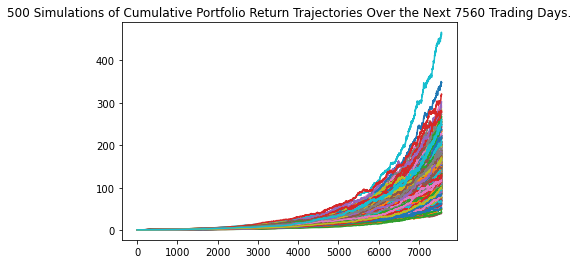

In [29]:
# Plot simulation outcomes
line_plot = MC_Shares.plot_simulation()

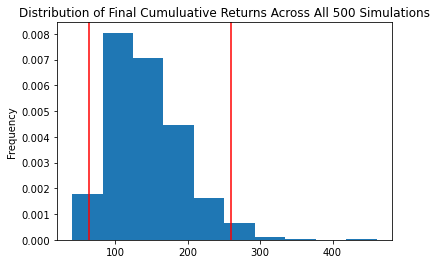

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Shares.plot_distribution()
dist_plot.get_figure().savefig('MC_Shares.png',bbox_inches='tight')

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Shares.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean            143.654550
std              52.039926
min              40.411035
25%             105.839226
50%             137.585945
75%             173.578536
max             460.770535
95% CI Lower     63.900336
95% CI Upper    260.144163
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1278006.73 and $5202883.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*20000*1.5,2)
ci_upper = round(tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1917010.09 and $7804324.9
